# Wikipedia-based Computational Analysis of MIC Prevalence in Engineering Disciplines

Authors: **Ishan Porwal and Jojo Liu**

In [1]:
%load_ext autoreload
%autoreload 2

## Introduction
War, regardless of the era, has never failed to be a controversial topic. Especially at Olin, the topic of war, more specifically, the military-industrial complex (MIC), sparks deliberation and controversy in general discussion or in response to recent events. This is due to the nature of the student body and Olin's unique mission toward ethics and sustainability. Because of the school's values, beliefs among students may clash with the use of engineering in the MIC, raising questions such as whether it is ethical to have companies in the MIC come to career fairs or even sponsor our school and project teams. The controversial nature of this topic intrigued us to question how people perceive each engineering discipline based on relevance to the MIC. Our driving question is *"How does Wikipedia present each engineering discipline in relation to the military-industrial complex?"* We decided to use Wikipedia as a source because it is a collaborative platform where the general public can make edits and create new pages, reflecting the general population's unique perspectives and knowledge. Therefore, it can provide an overall basic, but good representation of topics that millions worldwide are known to read. Because of its large audience, an assumption can be made that Wikipedia portrays engineering disciplines in a way based on prevalent societal perceptions and biases. By analyzing the language and content of Wikipedia pages related to various engineering disciplines (which in our case means finding quantitative keyword match amounts between the content and military terminology), we aim to uncover the implicit associations between engineering disciplines and their perceived roles in the MIC. This analysis can offer insights into how these perceptions may influence public discourse and understanding of engineering disciplines, particularly in the context of ethical considerations surrounding the MIC.

## Methodology
*Sections 1, 2, 3, and 4 are in helpers.py. Section 5 is in results.py*
#### 1. Data Collection
Our list of keywords to search for was generated by entering the word "military" into [relatedwords.org](https://relatedwords.org/) and copying the resulting related words into a list. The list contained some words that might interfere with results such as "force" since they may be taken out of context so we manually removed them. Our algorithm also cannot detect phrases so we had to alter these to individual words. To collect initial data, the script uses the `scrape_page` function, which utilizes the requests library to scrape and parse all the HTML content of a specified Wikipedia page. The `get_words_from_paragraphs` and `find_bullet_words` functions are then used to extract paragraphs and unordered lists between paragraphs from the article and then append them to lists as strings of individual words. This ensures that all relevant textual information is captured and creates a comprehensive and appropriate set of words for analysis.




#### 2. Data Cleaning
To prepare the extracted words for analysis, the script uses the `clean_words_list` and `clean_bullet_list` functions. These functions filter out punctuation and citations from the extracted words. By reading through each string element in the list, it splits the string into individual characters and then sorts through each of them, essentially removing the character if they are a punctuation character or contain brackets with numbers between them, which indicates a citation. This process ensures ease of matching as the keywords need to exactly match the extracted text, which punctuation and citations may prevent.




#### 3. Keyword Matching
The script utilizes the `find_keyword_matches` function to compare the extracted words from each Wikipedia article against a predefined list of military terminology keywords. For each article, the function iterates through the list of sorted words, converting each word to lowercase for consistent comparison. If a word matches a keyword, it increments a counter and gets appended to a list containing other matched words. After processing all the words in the article, the function returns the counts and actual words of both matched and total words for each engineering discipline.




#### 4. Subpage Analysis
To analyze subpages linked from the main Wikipedia page, the script uses the `find_links`, `filter_links`, and `search_subpages` functions. The `find_links` function parses through the HTML content of the page looking for links, which then get filtered down to only relevant links through the function `filter_links`. Filtering worked by excluding links that went to either the main page or irrelevant pages, which were deduced by common attributes such as having colons in them. Finally, `search_subpages` would then analyze each subpage, applying the same keyword matching and counting process as for each main page. This returns all of the final and total matches, words, and their counts including both the main page and subpage content. In the function, we ended up just adding to and returning the initial variables instead of creating new variables indicating final and total data since Pylint would flash an error for too many local variables. By analyzing one subpage deep, the script provides a more comprehensive view of the presence of military terminology across the engineering disciplines' Wikipedia pages.




#### 5. Preparing for Analysis and Results
To parse through engineering discipline Wikipedia pages and gather the data used to match words against a list of keywords we created the function `process_disciplines` which iterates through each page title provided and runs the `find_all_matches` and `search_subpages` functions on them. It then stores this data into a dictionary containing the matched words, total words, and their counts. This function takes a very long time to run, about 15-20 minutes. The good news is that this function only has to be run once before using the `write_to_files` function which opens 4 different files and writes data in the dictionary to each respective one. These files are .txt files with `final_matched_words.txt` and `total_words.txt` which contain rows corresponding to a discipline followed by all the words separated by spaces, while `final_match_counts.txt` and `total_word_counts` contain rows corresponding to a discipline followed by its counts, all as strings. After this point, in order to restore the dictionary, we only had to run `create_discipline_matches` which takes much less time to create the initial dictionary since it simply reads the data stored in the files instead of having to scrape. Using this dictionary, it was relatively easy to create our visualizations for analysis. Our `gen_wordcloud` function just iterates through each discipline and its matched words and uses the WordCloud class from the `wordcloud` library to generate all the word clouds. `display_counts` simply iterates through each discipline and its counts and displays them as easily readable strings. `plot_bar_graph` uses the `matplotlib` library to plot a bar graph of match counts for each engineering discipline. Finally, `plot_stacked_bar_graph` stores percentages of all the words parsed through that are keyword matches and iterates through the counts for each discipline to plot the stacked bar graphs with the percentages listed on top. All of the data collected helped us answer our research question because we were able to determine the frequencies of words related to the military appearing within content for each engineering discipline. Higher frequencies indicated a higher correlation between the jargon and language used within the two domains which can be interpreted to show evidence of relationships between the MIC and different engineering disciplines.

## Results
Going back to the original question of *"How does Wikipedia present each engineering discipline in relation to the military-industrial complex?"*, we need to be able to well display our data in order to analyze and understand it. We can reference the `final_match_counts.txt`, `final_matched_words.txt`, `total_word_counts.txt`, and `total_words.txt` files to access the data used for the analysis. Then we can convert this data into an easily usable dictionary using our `create_discipline_matches` function as shown in the following code.

In [2]:
import results
# Initialize data dictionary
discipline_matches = results.create_discipline_matches("data/final_matched_words.txt", "data/total_words.txt", "data/final_match_counts.txt", "data/total_word_counts.txt")

The first visualization we used to analyze the data was word clouds. These helped to show us the frequency of different words that came up as keyword matches between military terminology and the words on these engineering disciplines' Wikipedia pages and subpages. The main reason we decided to use this visualization was because it's much easier for us to interpret whether the words being categorized as matches were actually related to military terminology or taken out of context and have no relationship to this. This helped us remove words that shouldn't really count as keyword matches from our list of keywords.

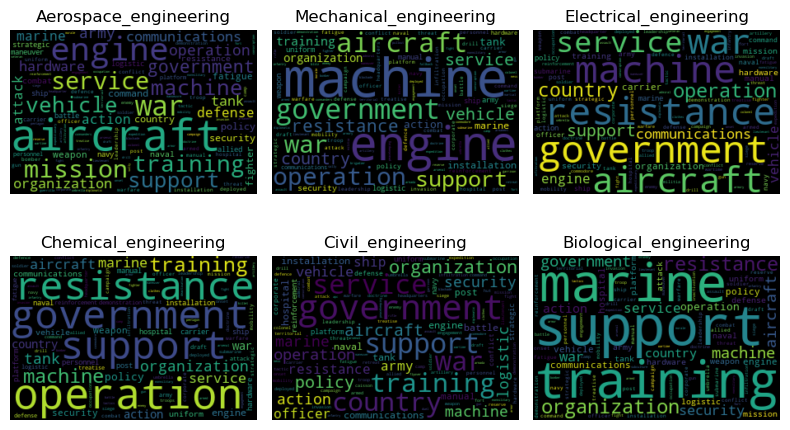

In [3]:
# Create wordclouds
results.gen_wordcloud(discipline_matches)

From these word clouds, we can see the highest frequencies of keyword matches across different engineering disciplines. For example, the most common match for Aerospace engineering was "aircraft" while the most common match for Biological engineering was "support." It also helped us validate that our code was working as we intended it to since "marine" is a very common keyword match in "Biological engineering" which makes contextual sense.

Next, we can display the results of our keyword matching and their varying frequencies across different engineering disciplines in the format of a bar graph.

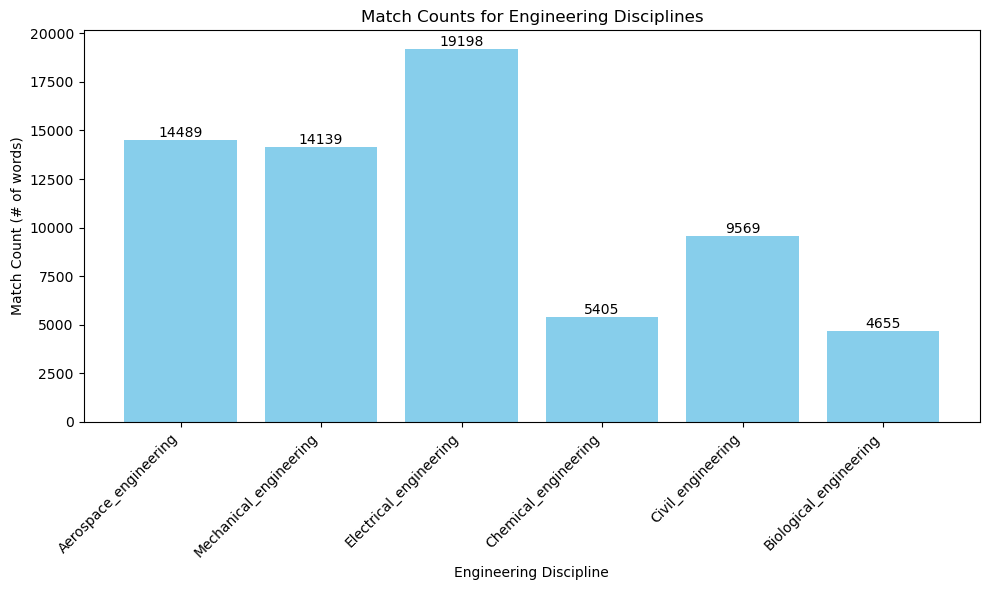

In [4]:
# Plot bar graph
results.plot_bar_graph(discipline_matches)

Based on the bar graph, we can see that Electrical engineering contained the highest number of keyword matches at 19,198. Following relatively closely behind were Aerospace engineering and Mechanical engineering, with match counts of 14,489 and 14,139 respectively. Civil engineering and Chemical engineering revealed relatively moderate match counts with 9,569 and 5,405 matches respectively. Finally, Biological engineering carried the lowest match count among the disciplines we decided to analyze, totaling 4,655 matches.


This initially led us to believe that Electrical engineering contained the highest MIC prevalence in its portrayal on Wikipedia compared to the other engineering disciplines. However, the next visualization we used helped us realize that this was not the case. We used a stacked bar graph to compare the percentage of keyword matches within the total words parsed through for each engineering discipline. This can help give a better idea of the actual prevalence of military-related terminology within each discipline.

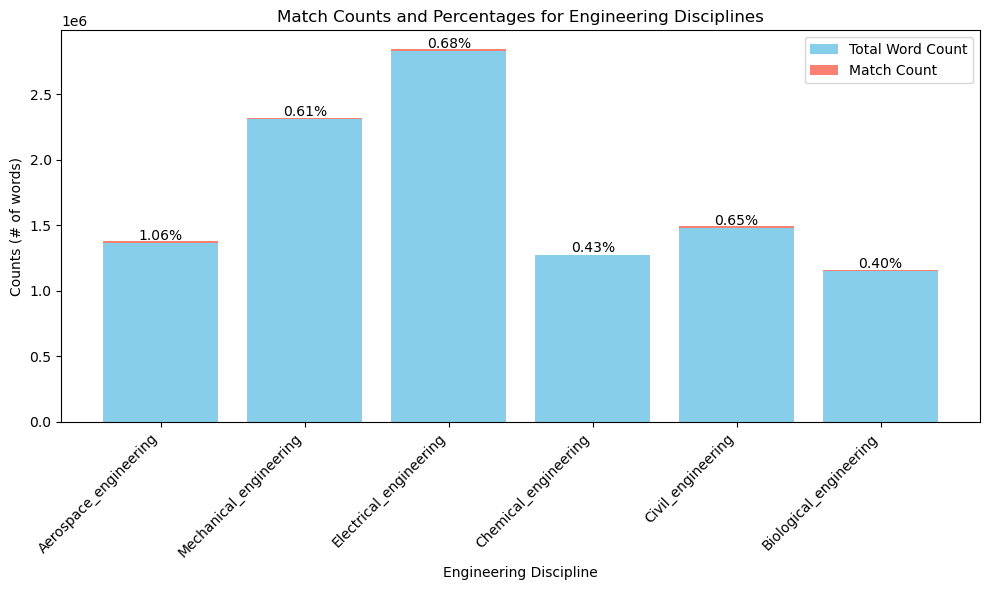

In [5]:
# Plot stacked bar graph
results.plot_stacked_bar_graph(discipline_matches)

In this stacked bar graph, the large blue bars depict the total word counts which overshadow the significantly smaller bars representing the keyword match counts. This illustrates that even though the high numbers of keyword matches appear substantial, relative to the total number of words parsed through these numbers are still small. The percentages displayed at the top of each discipline's statistic represent the portion of the total word count occupied by the keyword matches. Given this new perspective, Aerospace engineering emerges as the discipline with the highest MIC prevalence portrayed by Wikipedia with about 1.06% of words matching the keywords in the list of military terminology. Further, Electrical engineering now ranks second with about 0.68% but Biological engineering retains the lowest prevalence.

The following statistics provide a short quantitative summary of our results:

In [6]:
# Display count summary
print(results.display_counts(discipline_matches))

Engineering Discipline: Aerospace_engineering
Final Match Count: 14489
Total Word Count: 1364899

Engineering Discipline: Mechanical_engineering
Final Match Count: 14139
Total Word Count: 2305833

Engineering Discipline: Electrical_engineering
Final Match Count: 19198
Total Word Count: 2824308

Engineering Discipline: Chemical_engineering
Final Match Count: 5405
Total Word Count: 1270056

Engineering Discipline: Civil_engineering
Final Match Count: 9569
Total Word Count: 1481602

Engineering Discipline: Biological_engineering
Final Match Count: 4655
Total Word Count: 1151404




## Interpretation

Before starting this project, we had a hypothesis that Aerospace engineering would most likely be portrayed as the engineering discipline most related to the military-industrial complex (MIC). According to Wikipedia, the development of aeronautical engineering occurred during the design of World War I military aircraft and greatly expanded between World Wars I and II. As stated in the introduction, since Wikipedia is a platform where pages are created and edited by the public, performing data analytics on Wikipedia can provide valuable insights into the public eye. However, it is important to note the ethical considerations of sourcing data from Wikipedia. Since truly anyone can contribute to these pages, this can increase the risk of bias and inaccuracies. Aside from this, we also sourced our list of military terminology from [relatedwords.org](https://relatedwords.org/). We chose this platform to generate the list because it runs on several different algorithms including word embedding and one that delves into Concept Net. However, we acknowledge that these algorithms and the words/phrases generated by them may still include biases. We also were forced to convert items with more than one word to singular word entries since our algorithms iterate through page content by singular words. In terms of privacy for our project, there aren't many ethical considerations to look at since Wikipedia and relatedwords.org are both open to the public. Our project has some contextual and ethical implications that our readers should be aware of. Ethically, as aforementioned, scraping data from Wikipedia raises concerns about information integrity. Contextually, we must mention that our project's results and interpretation are representative of Wikipedia's specific portrayal which may not translate to how these disciplines are portrayed overall.


After analyzing the frequencies of different keyword matches between military terminology and content related to different engineering disciplines, it was pretty easy to identify which fields were more contextually connected with MIC. For example, the most common matches for "Aerospace engineering" included "aircraft", "engine", "mission", and "war" while for "Biological engineering" the most common were "marine", "support", "training", and "organization."


Then, after we found the number of total matches for each discipline and visualized them using a bar graph, it appeared that Electrical engineering contained the most keyword matches and Aerospace and Mechanical engineering about the same amount behind. However, as mentioned in our results, this image didn't paint the whole picture. In order to do this, we had to take into account the total words parsed through for each engineering discipline. From this, we learned that Electrical engineering might have had a larger number of keyword matches because its page and subpages contained much more content to parse through and make matches with. When we compared the proportion of keyword matches to total words, Aerospace engineering as we hypothesized had a higher percentage of military-related terminology. This may be a reflection of the deep roots Aerospace engineering has in military applications as well as the fact that many aerospace technologies that are discussed on Wikipedia can be used for both military and civilian purposes. We also observed that Biological and Chemical engineering had relatively much less overlap with military terminology. Thus, the public perception of Biological and chemical engineering may indicate that they are less related to MIC than the other disciplines. This may be because compared to Aerospace engineering and Electrical engineering, these disciplines tend to be more civilian-oriented than military-centric.


Through the completion of this project, we as a team learned how to utilize and manipulate different libraries that we had no prior experience with. We also discovered the importance of having clean and easily readable functions instead of long lengths of code. The better organization we had, the easier it was to work with our code. We even added diverse visualization creation to our software engineering toolbox as well as how necessary unit tests are when writing your own functions. However, along the way, we also faced some difficulties with our implementation. Right from the get-go, we started by using a library that we didn't realize until a week later was very outdated so it didn't have access to any pages published after 2014. We also had difficulties implementing our filtering functions because they required consideration of very specific use cases. Further, our code itself contains several limitations for its capabilities. One limitation that we realized early on is that our filtering functions would break down entire paragraphs and bullet points into individual words, which fails to preserve the phrasing and context of words. This approach undermined the accuracy of our keyword-matching process, as it failed to recognize the significance of multi-word expressions, potentially leading to inaccuracies in our findings. Relating to this, another limitation would pertain to ambiguity because our keywords may have double meanings. Because no phrasing and context were preserved, the word "tank", for example, could mean either the armored vehicle or the container that holds liquids. This is just one example of many where there could be instances of keyword detection even though the usage of the word is coincidental and not related to the MIC at all. A possible resolution to these limitations implementing a function to additionally scan through phrases as well, which would preserve context in how these keywords are being used and ultimately increase counting accuracy. A third limitation would be how unordered lists (bullet points) were found. The function looked through all unordered lists in the Wikipedia page, but would only choose to append it to a list if it were between two paragraphs of text. This was because the general structure of these articles was to have relevant information that was in bullet point form in between paragraphs of the main text. However, if an article were to have unordered lists that contained relevant information at the beginning or end of the article, it would not be recognized and potential keyword matches may be lost. In order to combat this limitation, in the future we may consider implementing a more comprehensive approach that can extract content from all unordered lists systematically regardless of their placement in the article to make sure we don't lose these potential matches. A final limitation would be regarding link filtering once a link is parsed from the article's HTML content. Because it relies on removing links with specific structures determined by general observation, such as containing "Main_page" or ":" to only preserve links that lead to subpages with relevant information, there may be some instances of links containing such characters containing wanted text. A possible fix would be going through the subpages from the links and checking if any keywords are in them, which will allow the function to decide whether the link is worth keeping or not.